In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime
import geopandas as gpd

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/VasiaPiven/covid19_ua/master/covid19_by_settlement_dynamics.csv')
data

,zvit_date,registration_area,registration_region,registration_settlement,new_susp,new_confirm,active_confirm,new_death,new_recover
0,2020-11-13,Вінницька,Барський район,Антонівка,0,0,2,0,0
1,2020-11-13,Вінницька,Барський район,Балки,0,0,1,0,0
2,2020-11-13,Вінницька,Барський район,Бар,1,1,49,0,0
3,2020-11-13,Вінницька,Барський район,Войнашівка,0,0,1,0,0
4,2020-11-13,Вінницька,Барський район,Володіївці,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
829535,2020-01-29,Житомирська,Житомир,Житомир,1,0,0,0,0
829536,2020-01-29,Івано-Франківська,Надворнянський район,Надвірна,1,0,0,0,0
829537,2020-01-29,Львівська,Львів,Львів,1,0,0,0,0
829538,2020-01-27,Львівська,Львів,Львів,1,0,0,0,0


In [3]:
obl = data[(data['registration_area'] == 'Львівська')]
obl


,zvit_date,registration_area,registration_region,registration_settlement,new_susp,new_confirm,active_confirm,new_death,new_recover
4619,2020-11-09,Львівська,Борислав,Борислав,0,0,107,0,1
4620,2020-11-09,Львівська,Бродівський район,Берлин,0,0,1,0,0
4621,2020-11-09,Львівська,Бродівський район,Білявці,0,0,3,0,0
4622,2020-11-09,Львівська,Бродівський район,Бовдури,0,0,1,0,0
4623,2020-11-09,Львівська,Бродівський район,Бордуляки,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...
790049,2020-03-16,Львівська,Перемишлянський район,Перемишляни,1,0,0,0,0
790124,2020-03-13,Львівська,Кам'янка-Бузький район,Прибужани,1,0,0,0,0
790229,2020-01-31,Львівська,Самбірський район,Стрілковичі,0,0,0,0,1
790232,2020-01-29,Львівська,Львів,Львів,1,0,0,0,0


In [4]:
obl_group = obl.groupby('zvit_date').sum()
obl_group.tail(10)

,new_susp,new_confirm,active_confirm,new_death,new_recover
zvit_date,,,,,
2020-10-31,383,397,9426,19,58
2020-11-01,492,484,9831,9,66
2020-11-02,410,317,10031,8,109
2020-11-03,493,261,10243,7,42
2020-11-04,390,345,10473,17,98
2020-11-05,370,448,10720,7,193
2020-11-06,546,565,11232,2,51
2020-11-07,329,192,11398,8,18
2020-11-08,445,209,11576,5,25


In [5]:
#del obl_group['active_confirm']

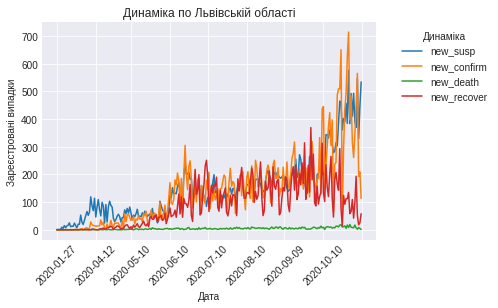

In [6]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots()
for column in obl_group:
    plt.plot(obl_group.index, obl_group[column], marker='', label=column)
plt.legend(title='Динаміка', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Динаміка по Львівській області')
plt.xlabel('Дата')
plt.ylabel('Зареєстровані випадки')
plt.tick_params(axis = 'x', labelrotation = 45)
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)
plt.show()

In [4]:
region = data.groupby(['zvit_date', 'registration_area']).sum()
region.tail(50)

new_susp  new_confirm  active_confirm  \
zvit_date  registration_area                                          
2020-11-12 Івано-Франківська         3          101           14927   
           Волинська               405          106            6380   
           Вінницька               214          188            5457   
           Дніпропетровська        741           33           11657   
           Донецька                550          340            9516   
           Житомирська             542          516            9143   
           Закарпатська            364          256           10410   
           Запорізька              367           42           14440   
           Київська                737           99           13382   
           Кіровоградська           53           63            1654   
           Луганська               118          151            2298   
           Львівська               443          193           11249   
           Миколаївська            286          256            7935   
           Одеська                 570          481           23651   
           Полтавська              407          239            7968   
           Рівненська              381          430            5998   
           Сумська                 746            9           10552   
           Тернопільська           393          219            4189   
           Харківська              622          460           31297   
           Херсонська              213          227            3908   
           Хмельницька             563          258           10670   
           Черкаська               311           84            5036   
           Чернівецька             445          448           14570   
           Чернігівська            216          216            8735   
           м. Київ                 503           96           30220   
2020-11-13 Івано-Франківська         0          108           15035   
           Волинська               360           69            6431   
           Вінницька               260          217            5576   
           Дніпропетровська        623           19           11631   
           Донецька                612           94            9520   
           Житомирська             455          433            9159   
           Закарпатська            336           71           10476   
           Запорізька              313           35           14475   
           Київська                704           68           13357   
           Кіровоградська           99           50            1685   
           Луганська               141           82            2318   
           Львівська               557          108           11271   
           Миколаївська            283            4            7936   
           Одеська                 659          177           23788   
           Полтавська              335          139            8062   
           Рівненська              318          259            6071   
           Сумська                 493            9           10487   
           Тернопільська           418          312            4370   
           Харківська              661          587           31874   
           Херсонська              267          165            3973   
           Хмельницька             470           67           10602   
           Черкаська               513          145            5173   
           Чернівецька             369          358           14924   
           Чернігівська            278          251            8616   
           м. Київ                 298           58           30047   

                              new_death  new_recover  
zvit_date  registration_area                          
2020-11-12 Івано-Франківська          0            0  
           Волинська                  8           31  
           Вінницька                  3           84  
           Дніпропетровська           1           11  
       

In [8]:
def validate(date_text):
    try:
        datetime.datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        print("правильний формат дати, спробуйте ще раз в форматі YYYY-MM-DD")
        return False

In [9]:
def region_analiz():
    print('Порівняти дані по конкретній даті?\n 0 - ні\n 1 - так')
    b = int(input())
    if b == 1:
        print("Введіть дату в форматі YYYY-MM-DD")
        d = input()
        if validate(d) == False:
            d = input()
        region = data[(data['zvit_date'] == d)].groupby(['registration_area']).sum()
    elif b == 0:
        region = data.groupby(['zvit_date', 'registration_area']).sum()
    region.tail(50)
    region.to_excel('region_analiz.xlsx')
    return region

In [11]:
region = region_analiz()
region

Порівняти дані по конкретній даті?
 0 - ні
 1 - так
Введіть дату в форматі YYYY-MM-DD


,new_susp,new_confirm,active_confirm,new_death,new_recover
registration_area,,,,,
Івано-Франківська,0,49,13153,0,0
Волинська,344,48,6343,4,42
Вінницька,198,171,5146,2,217
Дніпропетровська,358,19,10170,0,13
Донецька,411,61,9441,1,50
Житомирська,627,614,8717,1,139
Закарпатська,428,50,9395,0,2
Запорізька,193,15,11675,0,20
Київська,645,56,11314,1,2


In [12]:
def dia_plotbar(datalist, reg):
    if len(datalist) == 1:
        plt.hist(region[datalist[0]].loc[reg])
        plt.title('Порівняльна динаміка по областях')
    else:
        vol = region[datalist].loc[reg]
        vol.plot.bar(colormap = 'plasma')
        plt.title('Порівняльна динаміка по областях')

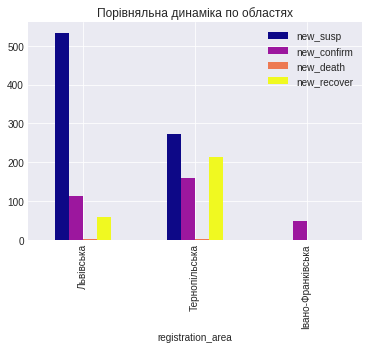

In [13]:
#col = ['new_susp', 'new_confirm', 'active_confirm','new_death', 'new_recover']
#['Івано-Франківська', 'Волинська', 'Вінницька', 'Дніпропетровська', 'Донецька', 'Житомирська', 'Закарпатська', 'Запорізька', 'Київська',     'Кіровоградська', 'Луганська', 'Львівська', 'Миколаївська', 'Одеська', 'Полтавська', 'Рівненська', 'Сумська', 'Тернопільська', 'Харківська', 'Херсонська', 'Хмельницька', 'Черкаська', 'Чернівецька', 'Чернігівська', 'м. Київ'],
col = ['new_susp', 'new_confirm', 'new_death', 'new_recover']
reg = ['Львівська', 'Тернопільська', 'Івано-Франківська']
dia_plotbar(col, reg)
fig.savefig('dynamic.png', dpi=300)

In [14]:
fp = 'ukr_admbnda_adm1_q2_sspe_20171221.shp'
map_df = gpd.read_file(fp, encoding='utf-8')
merged = (map_df.set_index('ADM1_UA')).join(region)
merged.head(25)

,Shape_Leng,ADM1_EN,ADM1_RU,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1UA,ADM1ALT2UA,ADM1ALT1RU,...,adm1Clas,adm1p2016,Shape_Le_1,Shape_Area,geometry,new_susp,new_confirm,active_confirm,new_death,new_recover
Івано-Франківська,9.985043,Ivano-Frankivska,Ивано-Франковская,UA26,Ivano-Frankivska,None,None,None,None,None,...,81200000.0,2600000000,9.985043,1.704293,"POLYGON ((24.48616 49.55764, 24.49390 49.55562...",0.0,49.0,13153.0,0.0,0.0
Автономна Республіка Крим,24.940387,Avtonomna Respublika Krym,Автономная Республика Крым,UA01,Avtonomna Respublika Krym,None,None,None,None,None,...,81200000.0,0100000000,24.940387,2.841844,"MULTIPOLYGON (((35.37597 45.26085, 35.37507 45...",NaN,NaN,NaN,NaN,NaN
Волинська,12.315116,Volynska,Волынская,UA07,Volynska,None,None,None,None,None,...,81200000.0,0700000000,12.315116,2.590723,"POLYGON ((25.21264 51.96673, 25.21356 51.96661...",344.0,48.0,6343.0,4.0,42.0
Вінницька,12.412550,Vinnytska,Винницкая,UA05,Vinnytska,None,None,None,None,None,...,81200000.0,0500000000,12.412550,3.251039,"POLYGON ((28.86892 49.88948, 28.87568 49.88922...",198.0,171.0,5146.0,2.0,217.0
Дніпропетровська,17.708313,Dnipropetrovska,Днепропетровская,UA12,Dnipropetrovska,None,None,None,None,None,...,81200000.0,1200000000,17.708313,3.867523,"POLYGON ((34.94852 49.19204, 34.94905 49.19200...",358.0,19.0,10170.0,0.0,13.0
Донецька,14.913600,Donetska,Донецкая,UA14,Donetska,None,None,None,None,None,...,81200000.0,1400000000,14.913600,3.197549,"POLYGON ((37.89024 49.21875, 37.88993 49.21168...",411.0,61.0,9441.0,1.0,50.0
Житомирська,14.132137,Zhytomyrska,Житомирская,UA18,Zhytomyrska,None,None,None,None,None,...,81200000.0,1800000000,14.132137,3.790817,"POLYGON ((27.65437 49.80413, 27.65432 49.80421...",627.0,614.0,8717.0,1.0,139.0
Закарпатська,8.569714,Zakarpatska,Закарпатская,UA21,Zakarpatska,None,None,None,None,None,...,81200000.0,2100000000,8.569714,1.549695,"POLYGON ((22.58336 49.09703, 22.58336 49.09703...",428.0,50.0,9395.0,0.0,2.0
Запорізька,14.018314,Zaporizka,Запорожская,UA23,Zaporizka,None,None,None,None,None,...,81200000.0,2300000000,14.018314,3.231170,"MULTIPOLYGON (((36.22324 46.56331, 36.22304 46...",193.0,15.0,11675.0,0.0,20.0
Київська,2.832565,Kyivska,Киевская,UA80,Kyivska,None,None,None,None,None,...,81230100.0,8000000000,2.832565,0.105591,"POLYGON ((30.72197 50.59061, 30.72199 50.59061...",645.0,56.0,11314.0,1.0,2.0


In [15]:
g = [i for i in map_df.geometry]
all_coords = []
for b in g[0].boundary: # for first feature/row
    coords = np.dstack(b.coords.xy).tolist()
    all_coords.append(*coords)

#all_coords

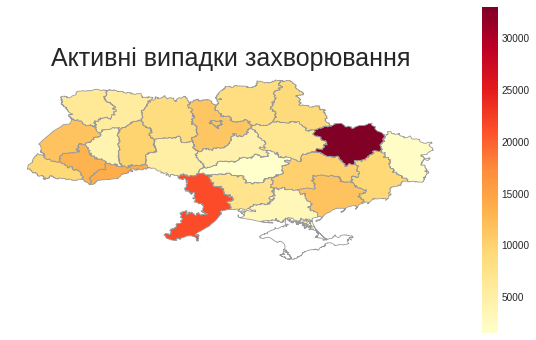

In [16]:
variable = 'active_confirm'
vmin, vmax = min(merged['active_confirm']), max(merged['active_confirm'])
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor="0.6")
ax.axis('off')
ax.set_title('Активні випадки захворювання', fontdict={'fontsize':'25', 'fontweight':'3'})
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm = plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
fig.savefig('map_export.png', dpi=300)

